# Homework 2: Introduction to Modeling in Python
## Housing Prices

 We are going to take a look at modeling housing prices in python and try our hand at predicting them along the way!

*Note: This was a pretty hard assignment for me. I'm not sure if everyone else felt fairly comfortable with this, but I definitely needed some handholding until just about 1 pm today. So that is fun.*


<img src="housing.jpg">

### Import Modules
To start off, we need to import the basic packages. These will allow us to import our data, and more importantly, manipulate and visualize it. 


In [54]:
#Import the basic packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy
#import modules that describe distributions
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
#turn off warnings for sns depreciated versions- this is the best
import warnings
warnings.filterwarnings('ignore')

### Import Training Data

Now that we have set up the environment, it is time for us to bring in the actual datasets. Although I now know that I would have preferred to bring both sets, it was suggested to us that we should bring in only the training data to begin. Lets go through the steps for that!


- Read in the data and view it to make sure we can see it properly.

In [55]:
#import the train data from the csv and visualize the first couple of rows
train_df = pd.read_csv(r"C:\Users\zgeorge\Dropbox (CMN Hospitals)\George\School\Fall 2018\Applied Machine Learning\AML_code\Homework 2\Data\train.csv")
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- We should immediately drop the ID column so it doesn't affect any of our models. Then we will redisplay our head to verify.

In [56]:
#Drop Id Axis
train_df=train_df.drop('Id',axis=1)
train_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Cleaning the Data

#### Categorical vs. Numerical

There are so many columns on this dataset, that I can't easily wrap my head around them. I've added a link to the data description [here](files/Data/data_description.txt) so that we can go back and look at what the available variables are in our data set. It is my belief that some variables that appear to be numeric are actually categorical, and possibly the reverse is true as well. So we are going to check into that by displaying each of the columns and verifying against the data descriptions linked to above

In [57]:
#Create a list that displays only numeric variables
numeric_var=train_df.select_dtypes(include=[np.number]).columns

In [58]:
#show list of columns that are numeric
'Numeric Variables: ',numeric_var

('Numeric Variables: ',
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'))

When we check against the data descriptions provided with the data, we see a couple of variables that are miscategorized:


- MSSubclass (the type of dwelling- this is not a number but rather a categorization)
- MoSold (the month it was sold- again, not truly a number, but rather is a category as it is not continuous and a higher month doesn't suggest a specifically lower or higher price)


So we are going to reassign those as categorical and then check the categorical variables. 

In [59]:
#fix the variables that should be categorical
train_df[['MSSubClass','MoSold']] = train_df[['MSSubClass','MoSold']].astype('category')
#show the categorical variables
cat_var=train_df.select_dtypes(exclude=[np.number]).columns
'Categorical Variables: ',cat_var

('Categorical Variables: ',
 Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
        'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
        'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
        'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
        'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
        'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
       dtype='object'))

Fantastic. Looks like our variables types are correctly assigned. At this point we need to check for skew, outliers and other issues with the data. To start we will describe the data. 

### Cleaning the Data
#### Checking for skew

Skew can badly affect models as explained by [StatisticsHowTo](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/). In order to check for and remove it, we will plot the distribution of SalePrice and attempt to correct it using multiple types of transformations.

In [60]:
#Describe the dataset as we now have it
train_df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


- This is the straight forward model

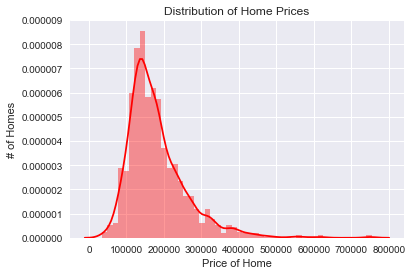

mean :  180921.19589041095
var  :  6306788585.349301
skew :  1.880940746034036
kurt :  6.509812011089439


In [61]:
#show plot 1
fig, ax = plt.subplots()
sns.distplot(train_df['SalePrice'],50,color='red')
plt.title('Distribution of Home Prices')
ax.set_xlabel('Price of Home')
ax.set_ylabel('# of Homes')
plt.show()
#create function that describes the distributions
def showmethedist(x):
    print("mean : ", np.mean(x))
    print("var  : ", np.var(x))
    print("skew : ",skew(x))
    print("kurt : ",kurtosis(x))
#describe the distribution
showmethedist(train_df['SalePrice'])

It is fairly obvious even without the description of the distribution see that it has right skew, so after looking up serveral sites, I found some transformations that we can apply to descrease the skew and kurtosis:
- square root
- cube root
- log 

We will apply each of these and then plot them. We will then use the best one for the regressions.

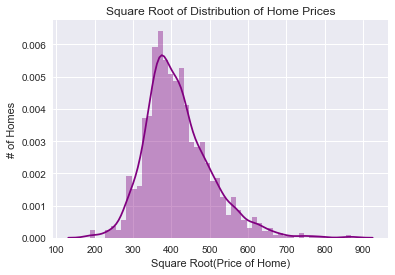

mean :  416.6172247994036
var  :  7351.283890853848
skew :  0.9421834681211159
kurt :  1.9469987212364908


In [62]:
#transform the data using a squareroot
normedprice = np.sqrt(train_df['SalePrice'])
#display the plot
fig, ax = plt.subplots()
sns.distplot(normedprice,50,color='purple')
plt.title('Square Root of Distribution of Home Prices')
ax.set_xlabel('Square Root(Price of Home)')
ax.set_ylabel('# of Homes')
plt.show()
#describe distribution
showmethedist(normedprice)

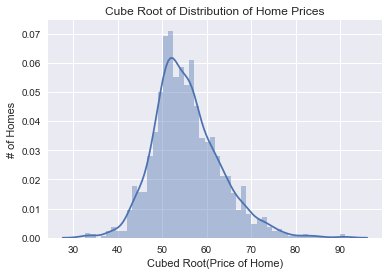

mean :  55.53054173773118
var  :  56.440443367580585
skew :  0.6660824155925081
kurt :  1.2589706508938159


In [63]:
#transform the data using a cuberoot
normedprice = np.cbrt(train_df['SalePrice'])
#display the plot
fig, ax = plt.subplots()
sns.distplot(normedprice,50)
plt.title('Cube Root of Distribution of Home Prices')
ax.set_xlabel('Cubed Root(Price of Home)')
ax.set_ylabel('# of Homes')
plt.show()
#describe the distribution
showmethedist(normedprice)

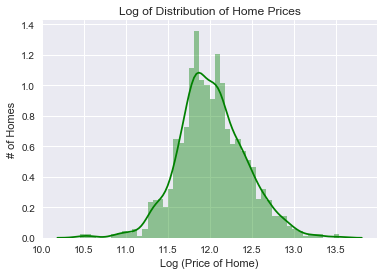

mean :  12.024050901109373
var  :  0.15945250615661058
skew :  0.1212103673013655
kurt :  0.8026555069117713


In [64]:
#transform the data using a cuberoot
normedprice = np.log(train_df['SalePrice'])
#display the plot
fig, ax = plt.subplots()
sns.distplot(normedprice,50,color='green')
plt.title('Log of Distribution of Home Prices')
ax.set_xlabel('Log (Price of Home)')
ax.set_ylabel('# of Homes')
plt.show()
#describe the distribution
showmethedist(normedprice)

Clearly the log transformation is the best option in order to keep both the skew and kurtosis low. So we will now apply that to our actual data set!

In [65]:
#normalize the skewed data by applying a log transformation
train_df['SalePrice'] = np.log(train_df['SalePrice'])

#### Removing Outliers

Now looking at that distribution, it is clear that there are some outliers, but we aren't going to focus on the outliers in the SalePrice Column, but rather, let's look at the other variables! 

The first thing we will do is see what variables don't have any outliers, and show some data about them:

In [66]:
#show Max/Min statistics about the variables
q_df = train_df.quantile([0, 1])
#Plot the upper and lower bounds before outliers appear
q_df.loc['Lower_Bound'] =  train_df.mean()-3*train_df.std()
q_df.loc['Upper_Bound'] = train_df.mean()+3*train_df.std()
#We are going to transpose this so it is more easily digested and more importantly...
q_df = q_df.T
#We can now flag whether or not each variable has a max greater than the upper bound or a min lower than the lower bound
q_df['check'] = (q_df.iloc[:, 0]<q_df.iloc[:, 2]) | (q_df.iloc[:, 1] > q_df.iloc[:, 3])
#show only variables with no outliers
q_df[q_df.check != True]

,0.0,1.0,Lower_Bound,Upper_Bound,check
YearRemodAdd,1950.0,2010.0,1922.929533,2046.801974,False
FullBath,0.0,3.0,-0.087679,3.217816,False
GarageCars,0.0,4.0,-0.474822,4.009068,False
YrSold,2006.0,2010.0,2003.831468,2011.800039,False


Five. Five whole variables don't have outliers. In order to clean this data, it would likely take forever and we would have very few data points left. Instead, lets be more surgical and strategic about this. Lets pot what box and whisker charts would look like of all of the variables with outliers:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

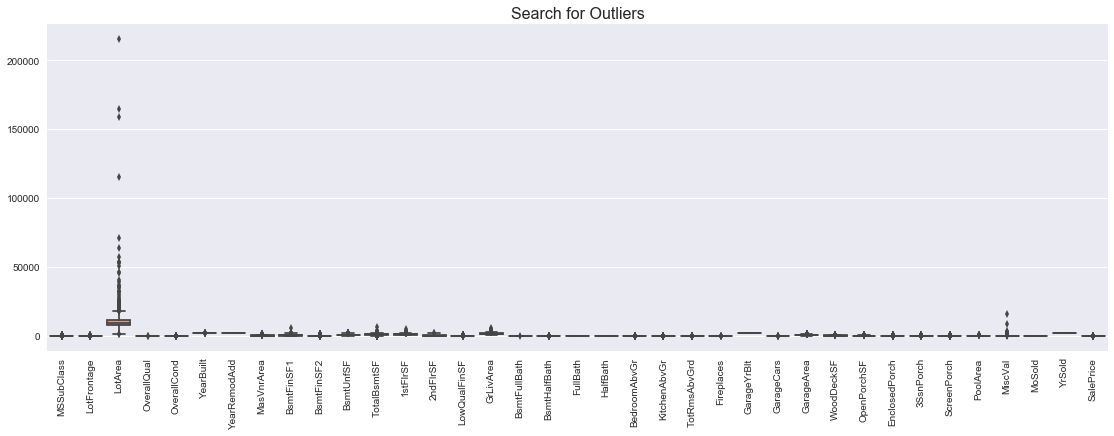

In [67]:
#Create box and whisker plot to see outliers; set plot size and title
plt.figure(figsize=(19,6))
bboxs = sns.boxplot(data=train_df)
plt.title('Search for Outliers',fontsize=16)
plt.xticks(rotation=90)

It appears that LotArea and MiscVal have the two most obvious outliers so lets work with those first. We will plot them against SalePrice and see if there are any outlers we can remove cleanly.

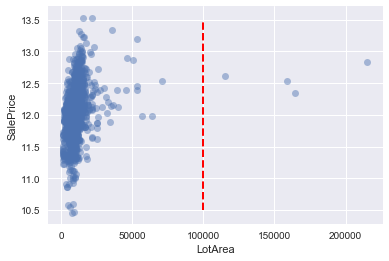

In [68]:
#scatter plot grlivarea/saleprice then draw a line for outliers
sns.regplot('LotArea','SalePrice',train_df,fit_reg=False,scatter_kws={'alpha':0.45})
plt.plot([100000, 100000],[10.5, 13.5],'r--', linewidth=2)

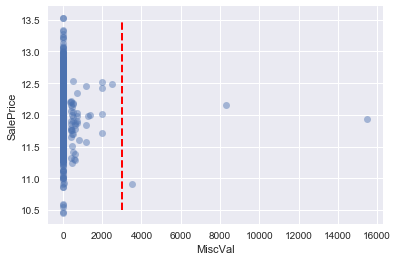

In [69]:
#scatter plot grlivarea/saleprice then draw a line for outliers
sns.regplot('MiscVal','SalePrice',train_df,fit_reg=False,scatter_kws={'alpha':0.45})
plt.plot([3000, 3000],[10.5, 13.5],'r--', linewidth=2)

Looks like we can cleanly slice off a couple of points without being too rough to the dataset at large. Lets go ahead and remove the outliers that we've demarcated off each of these:

In [70]:
#drop outliers in training data
train_df=train_df.query('LotArea <100000') 
train_df=train_df.query('MiscVal <3000') 

Although I don't see it immediately from our box and whisker chart, after reviewing the data descriptions, I feel like GrLivArea is pretty important, and if it has outliers, it could affect the regression, so lets check that variable as well:

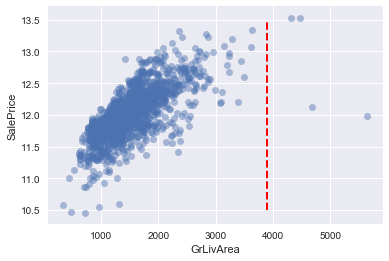

In [71]:
#scatter plot grlivarea/saleprice and draw line for outliners
sns.regplot('GrLivArea','SalePrice',train_df,fit_reg=False,scatter_kws={'alpha':0.45})
plt.plot([3900, 3900],[10.5, 13.5],'r--', linewidth=2)

Looks like we were right, we found another four outliers, bringing our total to eleven. That isn't even 1/100th of our observations, so I feel okay with leaving them out.

In [72]:
#drop outliers in training data
train_df=train_df.query('GrLivArea < 3900')

We have removed some outliers, but I'm worried about removing too many without affecting our dataset. After we finish the rest of the cleaning procedures, we can get back to that, but for now, lets just look to see if we have any covariates. 

#### Removal of Covariates

We know that especially for linear models, that can really cause issues. We're going to set up correlation matrices in order to fish out whether or not there are are any covariates that we can get rid of. 

Redundancies are redundant. 
Redundancies are redundant. 
Redundancies are redundant. 
Redundancies are redundant. 
Redundancies are redundant. 
Redundancies are redundant. 

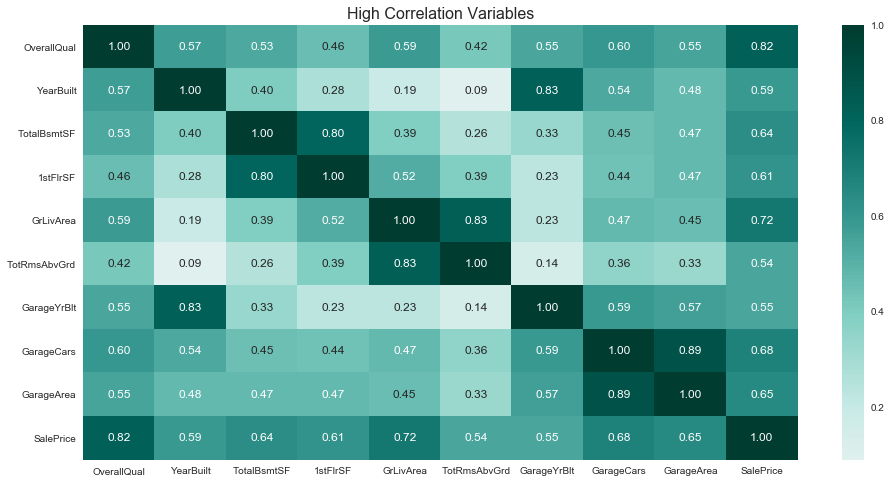

In [73]:
#Here we set up our correlation matrix for numeric variables
correlation=train_df[numeric_var].corr()
#Pull the max (whether positive or negative) correlation of each variable to another variable
aux=(abs(correlation)-np.identity(correlation.shape[0])).max()
#Throw out any variables that don't have at least .7 correlation with something else
selected_feats=aux[aux>0.69].index
sns.set()
fig, ax = plt.subplots(figsize=(16,8))
#make the plot have numbers, a legend and pretty colors
sns.heatmap(correlation.loc[selected_feats,selected_feats], annot=True,fmt='.2f',ax=ax,cmap="BrBG",center=0)
plt.title('High Correlation Variables',fontsize=16)
#show the plot
plt.show()

Wow. Those pretty colors worked pretty well! More to the point: It appears that there are four candidates for covariates. (I'm calling anything with .8 correlation or above a candidate)  Let's take a look:

- GarageYrBlt & YearBuilt
- 1stFlrSF & TotalBsmtSF
- GarageCars & GarageArea
- TotRmsAbvGrd & GrLivArea


So it looks like the year that the house was built and the year that the garage was built are heavily correlated. That makes some good sense. However, the YearBuilt is better correlated with SalePrice, so in this case, we're going to get rid of GarageYrBlt. Next we look at the first floor square footage vs. the total basement square footage. Again, the high correlation between these two variables makes good sense - they usually have the same floor plan. So like before, we are going to get rid of the variable that has the least effect on SalePrice: 1stFlrSF. The next one is the square footage of the garage or how many cars fit. This one also makes sense, however, I would have thought that the area was more heavily correlated with the SalePrice. Oh well. We'll be removing the GarageArea variable.

One last note- While the total number of rooms above ground and the Total living area above ground are heavily correlated, I don't believe that they truly measure the same thing. In this case, we will not remove either one, as I believe they play individual roles in determining the SalePrice.

In [74]:
#Remove these three columns from our training dataframe
train_df = train_df.drop(columns=['GarageArea','1stFlrSF','GarageYrBlt'])
#so we can keep using our list, lets remove the columns from there as well
numeric_var=numeric_var[numeric_var!='GarageArea'] 
numeric_var=numeric_var[numeric_var!='1stFlrSF']
numeric_var=numeric_var[numeric_var!='GarageYrBlt']

#### Look at our Progress

Now that we have removed the covariates, lets look at how our variables compare to SalePrice. This can help give us a better understanding of how they will play into our regression models.

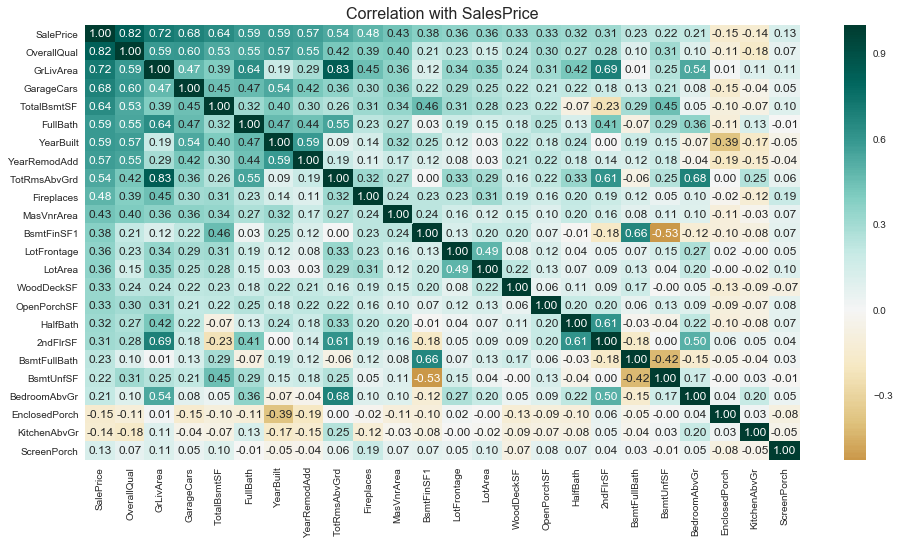

In [75]:
#Set up the same matrix, just without the columns we removed
correlation=train_df[numeric_var].corr() 
#sort variables by their correlation with SalePrice which gives us a nice picture
aux=abs(correlation['SalePrice']).sort_values(ascending=False) 
#Take the best 24 so it fits well and still has the most data
selected_feats=aux[0:24].index 
sns.set()
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(correlation.loc[selected_feats,selected_feats], annot=True,fmt='.2f',ax=ax,cmap="BrBG",center=0)
title = plt.title('Correlation with SalesPrice',fontsize=16)
#show plot
plt.show()

#### Dealing with Nulls

Although we are almost ready to run our models through regressions, one issue is that some of our variables have nulls. We need to take care of that before we can do anything else. Lets look at the numerical data first:

In [80]:
#because when categorical data has n/a's in many cases that is just another category. However the numerical should not have n/a's
numeric_train=train_df.select_dtypes(include=[np.number])
#create NA's count variable
nas = numeric_train.isnull().sum().sort_values(ascending=False)
#create percent variable
percent = 100*(numeric_train.isnull().sum()/numeric_train.isnull().count()).sort_values(ascending=False)
#combine lists
nasnum_train = pd.concat([nas, percent],axis=1,keys=['NAs','Percent'])
nasnum_train.head(3)

,NAs,Percent
LotFrontage,254,17.529331
MasVnrArea,8,0.552105
YrSold,0,0.000000


After looking at LotFrontage and finding that there is no good reason for the data to be missing, I've determined that 15% is far too much to attempt to fill in with the median or mean, and so we will delete this column entirely. We'll go ahead and attempt to fill in the rest of the MasVnrArea with the median number since there are only 8 NA's.

In [81]:
#drop LotFrontage
train_df=train_df.drop(['LotFrontage'],axis=1)

In [82]:
#Fill the Nulls in MasVnrArea with the median Value
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median())

Now its going to get messier with categorical data, because as we saw in the description, some null categorical data is a category in and of itself.

In [83]:
#because when categorical data has n/a's in many cases that is just another category. However the numerical should not have n/a's
cat_train=train_df.select_dtypes(exclude=[np.number])
#create NA's count variable
nas = cat_train.isnull().sum().sort_values(ascending=False)
#create percent variable
percent = 100*(cat_train.isnull().sum()/cat_train.isnull().count()).sort_values(ascending=False)
#combine lists & print
nascat_train = pd.concat([nas, percent],axis=1,keys=['NAs','Percent'])
nascat_train.head(16)

,NAs,Percent
PoolQC,1444,99.654934
MiscFeature,1400,96.618357
Alley,1358,93.719807
Fence,1169,80.676329
FireplaceQu,688,47.481021
GarageCond,80,5.521049
GarageQual,80,5.521049
GarageFinish,80,5.521049
GarageType,80,5.521049
BsmtFinType2,37,2.553485


O

In [25]:
train_df=train_df.drop(['MiscFeature','Alley','GarageCond','GarageQual','GarageFinish','GarageType',
                        'BsmtExposure','BsmtQual','BsmtCond','BsmtFinType2','MasVnrType','Fence'],axis=1)

In [26]:
train_df['FireplaceQu']=train_df['FireplaceQu'].fillna('No')
train_df['BsmtFinType1']=train_df['BsmtFinType1'].fillna('No')
train_df.shape

(1452, 65)

Dummy Variables

In [27]:
SalePrice = train_df.SalePrice
train_df=train_df.drop('SalePrice',axis=1)
cat_var_names=train_df.select_dtypes(exclude=[np.number]).columns
dummies_train=pd.get_dummies(train_df,prefix=cat_var_names)
premodel_var = dummies_train.columns
dummies_train.head(5)


,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,5,2003,2003,706,0,150,856,856,...,0,0,0,1,0,0,0,0,1,0
1,9600,6,8,1976,1976,978,0,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
2,11250,7,5,2001,2002,486,0,434,920,920,...,0,0,0,1,0,0,0,0,1,0
3,9550,7,5,1915,1970,216,0,540,756,961,...,0,0,0,1,1,0,0,0,0,0
4,14260,8,5,2000,2000,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


In [28]:
#get rid of any categories that test doesn't have
dummies_train=dummies_train.drop(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'PoolQC_Fa', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'Utilities_NoSeWa'],axis=1)

In [29]:
dummies_train.shape

(1452, 245)

Scale

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
scaler.fit(dummies_train)
scaled_train = scaler.transform(dummies_train)
scaled_train.shape

(1452, 245)

Prep data to be modeled and then exported

Modeling Time

In [32]:
from sklearn.linear_model import SGDRegressor, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve, train_test_split, RandomizedSearchCV


In [33]:
X_train, X_test, y_train, y_test = train_test_split(scaled_train, SalePrice, test_size=0.33, random_state=23)

In [34]:
param_options = {"eta0": [.0001, .0004, .001, .004, .01, .04, .1, .4, 1, 4],
             "tol": [.01, .001, .0001]}

linear_regression_model = SGDRegressor()

iterations = 20
random_search = RandomizedSearchCV(linear_regression_model,param_distributions=param_options,n_iter=iterations,
                                  cv=3, scoring='neg_mean_squared_error')

random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'tol': 0.0001, 'eta0': 0.004}
Best Negative MSE: -4.886110946118997


In [35]:
## source: http://scikit-learn.org/0.15/auto_examples/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\zgeorge\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

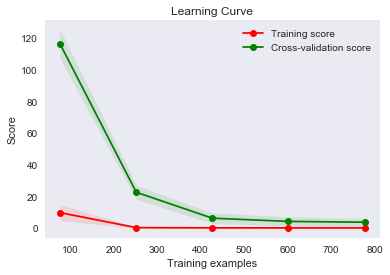

In [36]:
plot_learning_curve(random_search, "Learning Curve", X_train, y_train, cv=5)

Definitely looks like high variance, so we need to perform regularization

In [37]:
# l1 ratio of zero is l2 and visa-versa 
# alphas are how much to weight regularization
reg = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10])
reg.fit(X_train, y_train)
train_predictions = reg.predict(X_train)
test_predictions = reg.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 0.012430656857672336
Test MSE: 0.013534768273691234


WAAAAY better than the ~7 we got before!

In [38]:
#USE THIS!!!!!
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))
linear_var = sorted(list(zip(dummies_train.columns, reg.coef_)), key=lambda x: abs(x[1]),reverse=True)
linear_value = [i for i in linear_var if i[1] != 0]
linear_value

Train MSE: 0.012430656857672336
Test MSE: 0.013534768273691234


[('GrLivArea', 0.08344960132883746),
 ('OverallQual', 0.08127587657466484),
 ('TotalBsmtSF', 0.03741430655255842),
 ('GarageCars', 0.026085782482817593),
 ('BsmtFinSF1', 0.02608494962003989),
 ('OverallCond', 0.025566066795823864),
 ('GarageArea', 0.02332025710019952),
 ('YearRemodAdd', 0.023095883977167723),
 ('YearBuilt', 0.02205736804465873),
 ('1stFlrSF', 0.02169907793542094),
 ('LotArea', 0.021246903325649436),
 ('MSZoning_C (all)', -0.02101464544306899),
 ('MSZoning_RM', -0.015506066534782098),
 ('Neighborhood_Crawfor', 0.013545958593282429),
 ('Fireplaces', 0.013528500308599497),
 ('SaleType_New', 0.012691418407848501),
 ('TotRmsAbvGrd', 0.012469275797013159),
 ('Foundation_PConc', 0.012116520202874426),
 ('MSSubClass_30', -0.011874670131863992),
 ('HalfBath', 0.01027265814134366),
 ('HeatingQC_Ex', 0.009843329468150468),
 ('Functional_Typ', 0.009726633928716826),
 ('KitchenAbvGr', -0.009350210592039186),
 ('FullBath', 0.00863663230218617),
 ('BsmtFinType1_GLQ', 0.00857792850715

That is far fewer than the hundreds of values we had before! Lets go ahead and try plugging that data in!

## Bring in the Test Data

We need to perform all of the same transformations we did to the training set, to the test set

In [39]:
#import the train data from the csv and visualize the first couple of rows
test_df = pd.read_csv(r"C:\Users\zgeorge\Dropbox (CMN Hospitals)\George\School\Fall 2018\Applied Machine Learning\AML_code\Homework 2\Data\test.csv")
Test_IDs = test_df["Id"]
#test_df = test_df.drop('Id',axis=1)
print(test_df.shape)
test_df.head(5)

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [40]:
test_df[['MSSubClass','MoSold']] = test_df[['MSSubClass','MoSold']].astype('category')
test_df=test_df.drop(['LotFrontage'],axis=1)


test_df=test_df.drop(['Id','MiscFeature','Alley','GarageCond','GarageQual','GarageFinish','GarageType',
                        'BsmtExposure','BsmtQual','BsmtCond','BsmtFinType2','MasVnrType','Fence'],axis=1)
test_df['PoolQC']=test_df['PoolQC'].fillna('No')
test_df['FireplaceQu']=test_df['FireplaceQu'].fillna('No')
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna('No')

print(test_df.shape)
test_df.head(5)

(1459, 64)


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,120,0,No,0,6,2010,WD,Normal
1,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,No,12500,6,2010,WD,Normal
2,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,No,0,3,2010,WD,Normal
3,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,No,0,6,2010,WD,Normal
4,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,0,0,144,0,No,0,1,2010,WD,Normal


In [41]:
cat_var_names=test_df.select_dtypes(exclude=[np.number]).columns
dummies_test=pd.get_dummies(test_df,prefix=cat_var_names)
dummies_test.head(5)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,11622,5,6,1961,1961,468.0,144.0,270.0,882.0,896,...,0,0,0,1,0,0,0,0,1,0
1,14267,6,6,1958,1958,923.0,0.0,406.0,1329.0,1329,...,0,0,0,1,0,0,0,0,1,0
2,13830,5,5,1997,1998,791.0,0.0,137.0,928.0,928,...,0,0,0,1,0,0,0,0,1,0
3,9978,6,6,1998,1998,602.0,0.0,324.0,926.0,926,...,0,0,0,1,0,0,0,0,1,0
4,5005,8,5,1992,1992,263.0,0.0,1017.0,1280.0,1280,...,0,0,0,1,0,0,0,0,1,0


In [42]:
dummies_test.columns[dummies_test.isnull().any()]

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'GarageCars', 'GarageArea'],
      dtype='object')

In [43]:
for i in dummies_test.columns:     #df.columns[w:] if you have w column of line description 
    dummies_test[i] = dummies_test[i].fillna(dummies_test[i].median() )
print(dummies_test.columns[dummies_test.isnull().any()])
dummies_test.shape

Index([], dtype='object')


(1459, 247)

In [44]:
print(dummies_train.columns.difference(dummies_test.columns))
print(dummies_test.columns.difference(dummies_train.columns))

Index([], dtype='object')
Index(['MSSubClass_150', 'PoolQC_No'], dtype='object')


In [45]:
dummies_test=dummies_test.drop(['MSSubClass_150', 'PoolQC_No'],axis=1)

In [46]:
scaler = StandardScaler()
scaler.fit(dummies_test)
scaled_test = pd.DataFrame(scaler.transform(dummies_test))
scaled_test.shape


(1459, 245)

In [47]:
lin_test=pd.DataFrame()
lin_test['Id']=Test_IDs

lin_test['SalePrice']=np.exp(reg.predict(scaled_test))

In [49]:
#load it to my submission csv
lin_test.to_csv('ZGeorge_lin_test1.csv', index=False)

Not bad, but lets see if we can do much better?

### RidgeModel

In [53]:
from sklearn.linear_model import Ridge

In [58]:
ridge = Ridge()
paramgrid = {'alpha':[0.001,0.005,0.01,0.1,0.5,1],
              'normalize':[True,False], 'tol':[1e-06,3e-06,1e-05,3e-05,1e-02,3e-02]}
grid_ridge = GridSearchCV(ridge, paramgrid, cv=4, verbose=1, scoring = 'neg_mean_squared_error')
grid_ridge.fit(X_train, y_train)
train_predictions = grid_ridge.predict(X_train)
test_predictions = grid_ridge.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Fitting 4 folds for each of 72 candidates, totalling 288 fits
Train MSE: 0.007904779324243959
Test MSE: 0.014965809703498544


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:    3.5s finished


In [59]:
Ridge_test=pd.DataFrame()
Ridge_test['Id']=Test_IDs

Ridge_test['SalePrice']=np.exp(grid_ridge.predict(scaled_test))

In [60]:
#load it to my submission csv
Ridge_test.to_csv('ZGeorge_Ridge_test.csv', index=False)

## Random Forrest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'min_samples_split' : [2,3,5,7,11], 'n_estimators' : [55,70,100], 'random_state': [30] }
randFor_test = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, refit=True, verbose=1, scoring = 'neg_mean_squared_error')
randFor_test.fit(X_train, y_train)
train_predictions = randFor_test.predict(X_train)
test_predictions = randFor_test.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.1min finished


Train MSE: 0.0030305353210948517
Test MSE: 0.018601026961739694


In [64]:
randFor_results=pd.DataFrame()
randFor_results['Id']=Test_IDs

randFor_results['SalePrice']=np.exp(randFor_test.predict(scaled_test))

In [65]:
#load it to my submission csv
randFor_results.to_csv('ZGeorge_randFor_results.csv', index=False)